## Text Data - Sentiment Analysis


### SPRINT 1 - Create DataFrame from raw text files

#### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

### Extract the zip file

In [4]:
%%time
zip_file_path=r"C:\Users\mayaluri nani\Downloads\txt_reviews.zip"
extract_path=r"C:\Users\mayaluri nani\OneDrive\Desktop\text_project1"

with zipfile.ZipFile (zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

CPU times: total: 7min 32s
Wall time: 23min 18s


#### Walk through the folder

In [18]:
%%time
import os

def read_text_files(extract_path):
    ProductId=[]
    UserId=[]
    ProfileName=[]
    HelpfulnessNumerator=[]
    HelpfulnessDenominator=[]
    Score=[]
    Time=[]
    ReviewSummary=[]
    ReviewText=[]

    for root, dirs, files in os.walk(extract_path):
        for file_name in files:
            if file_name.endswith(".txt"):
                file_path = os.path.join(root, file_name)
                try:
                    with open(file_path, "r") as f:
                        lines = f.readlines()
                        if len(lines) >= 9:  # Ensure there are at least 9 lines
                            ProductId.append(lines[0].split(':')[1].strip())
                            UserId.append(lines[1].split(':')[1].strip())
                            ProfileName.append(lines[2].split(':')[1].strip())
                            HelpfulnessNumerator.append(lines[3].split(':')[1].strip())
                            HelpfulnessDenominator.append(lines[4].split(':')[1].strip())
                            Score.append(lines[5].split(':')[1].strip())
                            Time.append(lines[6].split(':')[1].strip())
                            ReviewSummary.append(lines[7].split(':')[1].strip())
                            ReviewText.append(lines[8].split(':')[1].strip())
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

    return ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, ReviewSummary, ReviewText


extract_path = r"C:\Users\mayaluri nani\OneDrive\Desktop\text_project1"
ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, ReviewSummary, ReviewText = read_text_files(extract_path)

print(f"Number of reviews read: {len(ProductId)}")


Number of reviews read: 568454
CPU times: total: 7min 23s
Wall time: 1h 37min 15s


#### Createing a data frame

In [46]:
def load_into_df(ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText):
    df = pd.DataFrame({"ProductId":ProductId,
                       "UserId":UserId,
                       "ProfileName":ProfileName,
                       "HelpfulnessNumerator":HelpfulnessNumerator,
                       "HelpfulnessDenominator":HelpfulnessDenominator,
                       "Score":Score,
                       "Time":Time,
                       "ReviewSummary":ReviewSummary,
                       "ReviewText":ReviewText})
    return df

In [47]:
%%time
df=load_into_df(ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText)

CPU times: total: 2.7 s
Wall time: 6.81 s


In [48]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  object
 4   HelpfulnessDenominator  568454 non-null  object
 5   Score                   568454 non-null  object
 6   Time                    568454 non-null  object
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


In [52]:
%%time
df["HelpfulnessNumerator"]=df['HelpfulnessNumerator'].astype('int')

CPU times: total: 62.5 ms
Wall time: 83.1 ms


In [53]:
df["HelpfulnessDenominator"]=df['HelpfulnessDenominator'].astype('int')

In [54]:
df['Score']=df['Score'].astype('int')

In [55]:
df['Time']=df['Time'].astype('int')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int32 
 4   HelpfulnessDenominator  568454 non-null  int32 
 5   Score                   568454 non-null  int32 
 6   Time                    568454 non-null  int32 
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: int32(4), object(5)
memory usage: 30.4+ MB


In [57]:
df.to_csv('Sentiment_analysis.csv')

### Step-1 Load the Data

In [2]:
df=pd.read_csv(r'C:\Users\LENOVO\Machine Learning\Projects\Sentiment_analysis.csv')

In [3]:
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df['Helpfulness']=df['HelpfulnessNumerator']/df['HelpfulnessDenominator']

In [6]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,NaN
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,0.0
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568404 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  int64  
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568379 non-null  object 
 8   ReviewText              568437 non-null  object 
 9   Helpfulness             298402 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 43.4+ MB


In [8]:
df[df['ReviewText'].isna()==True]

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
65859,B0021H0BXG,AD4QJRYAXIR0W,"Nozama ""Emirp""",0,0,4,1347148800,Above & BEEyond,NaN,NaN
104842,B002LMGV0S,AD4QJRYAXIR0W,"Nozama ""Emirp""",0,0,4,1347148800,Above & BEEyond,NaN,NaN
165546,B001CZ6CFY,A354AY83WZ2RLB,"S. fogarty ""Shaun""",1,5,5,1268092800,Costco fixed a problem!,NaN,0.20
174659,B002TSA91Q,A2D6Q5FLVYC4CP,B,2,4,5,1328918400,UPDATED,NaN,0.50
174982,B002TSA91G,A2D6Q5FLVYC4CP,B,2,4,5,1328918400,UPDATED,NaN,0.50
199188,B000FD9314,A170EOCWWXBLF5,zzzed,1,1,5,1163980800,delicious,NaN,1.00
224244,B000CQE3O6,A170EOCWWXBLF5,zzzed,9,9,5,1157068800,"light pleasing flavor, good price",NaN,1.00
231964,B001EO5RF4,A170EOCWWXBLF5,zzzed,40,40,5,1156291200,woah baby,NaN,1.00
237547,B004TEXC7G,A1KEIIW32S1EJ8,Sarah777,1,4,1,1305417600,bad bad bad,NaN,0.25
354320,B0021J6CFK,AD4QJRYAXIR0W,"Nozama ""Emirp""",0,0,4,1347148800,Above & BEEyond,NaN,NaN


In [9]:
df['Helpfulness'].fillna(0,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568404 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  int64  
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568379 non-null  object 
 8   ReviewText              568437 non-null  object 
 9   Helpfulness             568454 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 43.4+ MB


In [11]:
def score_review(score):
    if score==4 or score==5:
        return "Positive"
    elif score==3:
        return "Neutral"
    else:
        return "Negative"

In [12]:
df['Sentiment']=df['Score'].apply(score_review)

In [13]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,Positive
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Positive
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,0.0,Negative
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,Negative
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,Positive


In [14]:
df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               50
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
ReviewSummary             75
ReviewText                17
Helpfulness                0
Sentiment                  0
dtype: int64

In [15]:
df['ProfileName'].fillna(' ',inplace=True)
df['ReviewSummary'].fillna(' ',inplace=True)
df["ReviewText"].fillna(' ',inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568454 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  int64  
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568454 non-null  object 
 8   ReviewText              568454 non-null  object 
 9   Helpfulness             568454 non-null  float64
 10  Sentiment               568454 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 47.7+ MB


## 1. Show me some nice analysis on the given data.

### Step-2  Exploratory Data Analysis

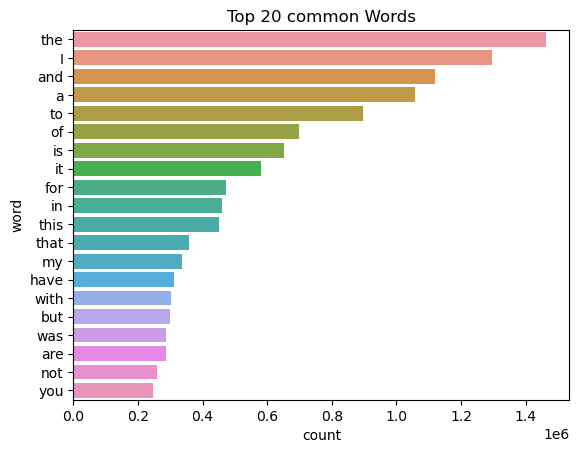

In [17]:
from collections import Counter
all_words = " ".join(df['ReviewText'].values).split()
word_counts=Counter(all_words)
common_words=word_counts.most_common(20)

most_common_df=pd.DataFrame(common_words,columns=['word','count'])

sns.barplot(data=most_common_df,y='word',x='count')
plt.title("Top 20 common Words")
plt.show()

From the above bar plot we can observe that 'the, I, and, a, to, of, is, it, for, in this, that, my, have, with, but, was, are, not, you' etc. We need to remove these stop words.

In [19]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

<Axes: xlabel='Score', ylabel='count'>

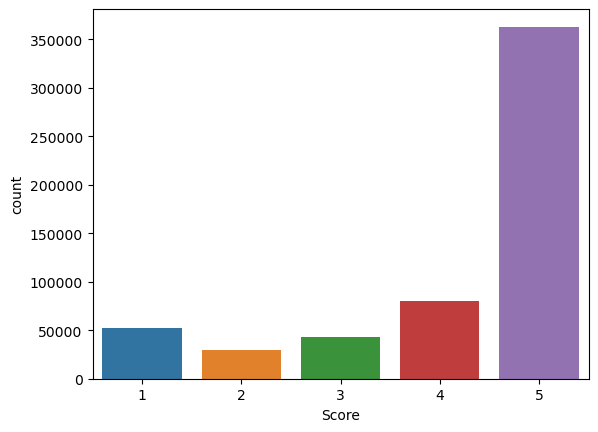

In [20]:
sns.countplot(data=df, x='Score')

From the above graph we can clearly see that  most of the people are giving five star rating

In [21]:
df['Sentiment'].value_counts()

Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

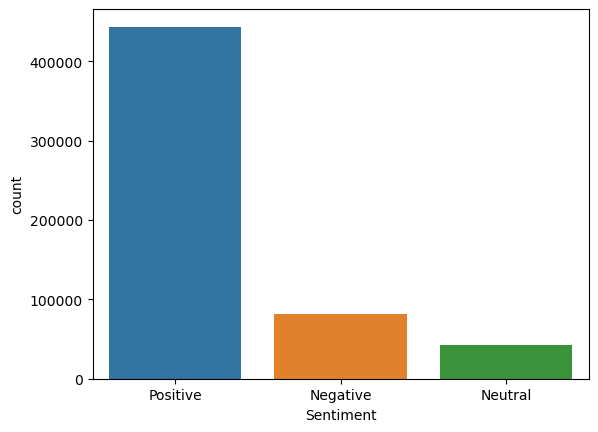

In [22]:
sns.countplot(data=df, x='Sentiment')

We can see that most of the reviews are positive reviews

In [18]:
#! pip install wordcloud

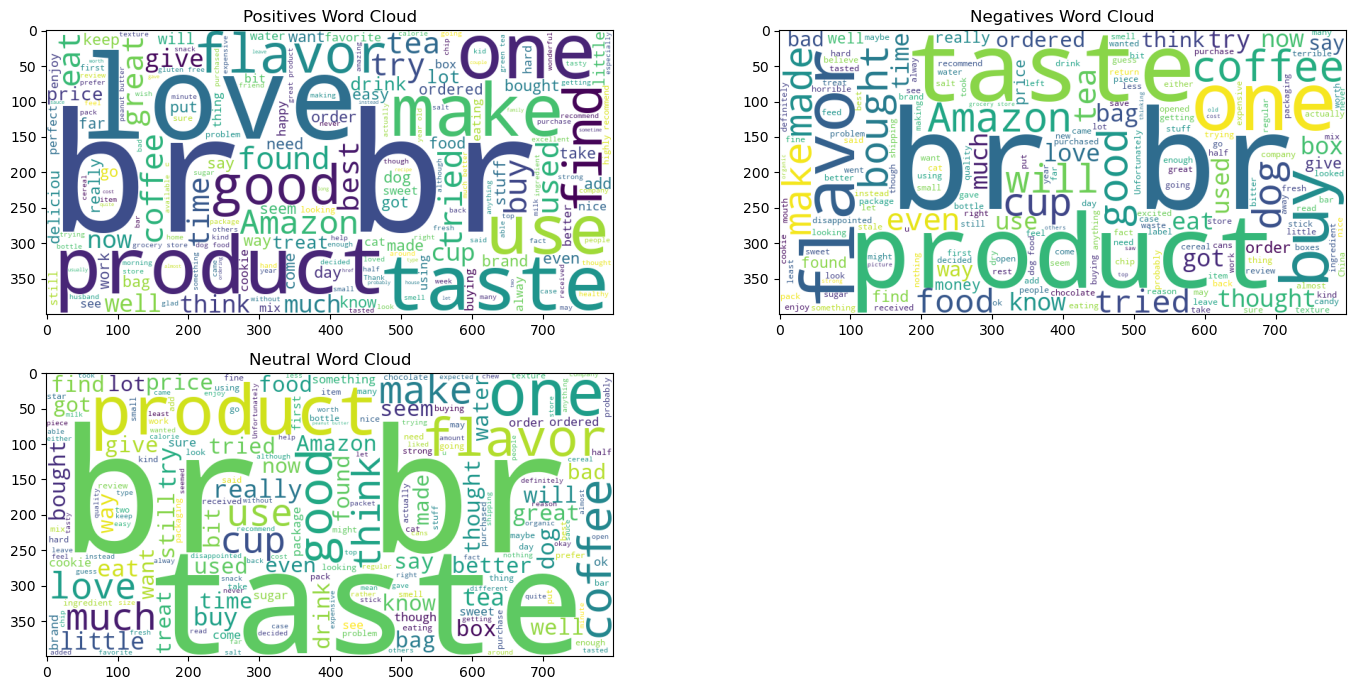

In [32]:
# Wordcloud
from wordcloud import WordCloud

positives_text = ' '.join(df[df['Sentiment']=='Positive']['ReviewText'].values)
positive_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(positives_text)

negatives_text = ' '.join(df[df['Sentiment']=='Negative']['ReviewText'].values)
negative_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(negatives_text)

neutrals_text = ' '.join(df[df['Sentiment']=='Neutral']['ReviewText'].values)
neutral_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(neutrals_text)

fig,ax=plt.subplots(2,2,figsize=(15,7))
ax=ax.flatten()

ax[0].imshow(positive_text_word_cloud)
ax[0].set_title("Positives Word Cloud")

ax[1].imshow(negative_text_word_cloud)
ax[1].set_title("Negatives Word Cloud")

ax[2].imshow(neutral_text_word_cloud)
ax[2].set_title('Neutral Word Cloud')

fig.delaxes(ax[3])
fig.tight_layout()
plt.show()

In this word cloud there are some most repeated words like 'br, taste, love, product, flavour, one, buy, found, coffee, make' etc. We need to remove these stop words.

## SPRINT 2 - Build a model


### Step-3  Segregate input and output

In [17]:
X=df[['ReviewText']]
y=df['Sentiment']
X.shape,y.shape

((568454, 1), (568454,))

### Step-4 Train Test split

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(426340, 1) (426340,)
(142114, 1) (142114,)


## Task A
### Step-5 Data Preprocessing

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#### Defining a function to clean the teext data

In [20]:
def clean(doc):
    regex="[^a-zA-Z.]"
    doc=re.sub(regex, ' ', doc)
    
    doc=doc.lower()
    
    tokens=nltk.word_tokenize(doc)
    
    stop_words=list(set(stopwords.words("english")))
    custom_stop_words = ['br','taste','product','love','flovour','one','buy','make']
    stop_words=stop_words+custom_stop_words
    
    filtered_token=[word for word in tokens if word  not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    lemmatizer_tokens = [lemmatizer.lemmatize(token) for token in filtered_token]
    
    return ' '.join(lemmatizer_tokens)

In [21]:
def tokenizer(doc):
    return nltk.word_tokenize(doc)

### Data Preparation on Train data

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(token_pattern = None,
                                 tokenizer = tokenizer,
                                 ngram_range=(1,1),
                                 lowercase=False,
                                 preprocessor = clean,
                                 stop_words=None)

X_train_transformed = bow_vectorizer.fit_transform(X_train['ReviewText'])

print("Shape:", X_train_transformed.shape)

Shape: (426340, 87386)


### Data Preparation on Test data

In [23]:
X_test_transformed=bow_vectorizer.transform(X_test['ReviewText'])
print("Shape :", X_test_transformed.shape)

Shape : (142114, 87386)


## Task B

### Model Building & Evaluation

### 1. Naive Baye's Classifier

In [24]:
import time

In [27]:
%%time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
start_time=time.time()
nb_classifier.fit(X_train_transformed, y_train)
end_time=time.time()
nb_time=end_time-start_time

start_time=time.time()
y_test_predict = nb_classifier.predict(X_test_transformed)
end_time=time.time()
nb_predict_time=end_time-start_time

nb_score=metrics.accuracy_score(y_test,y_test_predict)
print("Naive Bayes Accuracy :", nb_score)

nb_f_score = metrics.f1_score(y_test,y_test_predict,average='weighted')
print("Naive Baye's f1-score :", nb_f_score)

Naive Bayes Accuracy : 0.8349423702098315
Naive Baye's f1-score : 0.8305863877695292
CPU times: total: 4.94 s
Wall time: 4.93 s


### 2. Logistic Regression

In [28]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_reg = LogisticRegression()
start_time=time.time()
logistic_reg.fit(X_train_transformed, y_train)
end_time=time.time()
lr_time=end_time-start_time

start_time=time.time()
y_test_predict = logistic_reg.predict(X_test_transformed)
end_time=time.time()
lr_predict_time=end_time-start_time

logistic_score=metrics.accuracy_score(y_test, y_test_predict)
print("Logistic Regression Accuracy:", logistic_score)

logistic_f_score=metrics.f1_score(y_test, y_test_predict,average='weighted')
print("Logistic Regression f1-score:",logistic_f_score)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8612240877042374
Logistic Regression f1-score: 0.8442820960510028
CPU times: total: 3min 48s
Wall time: 1min 16s


## 2. Show me the comparison of various ML models.

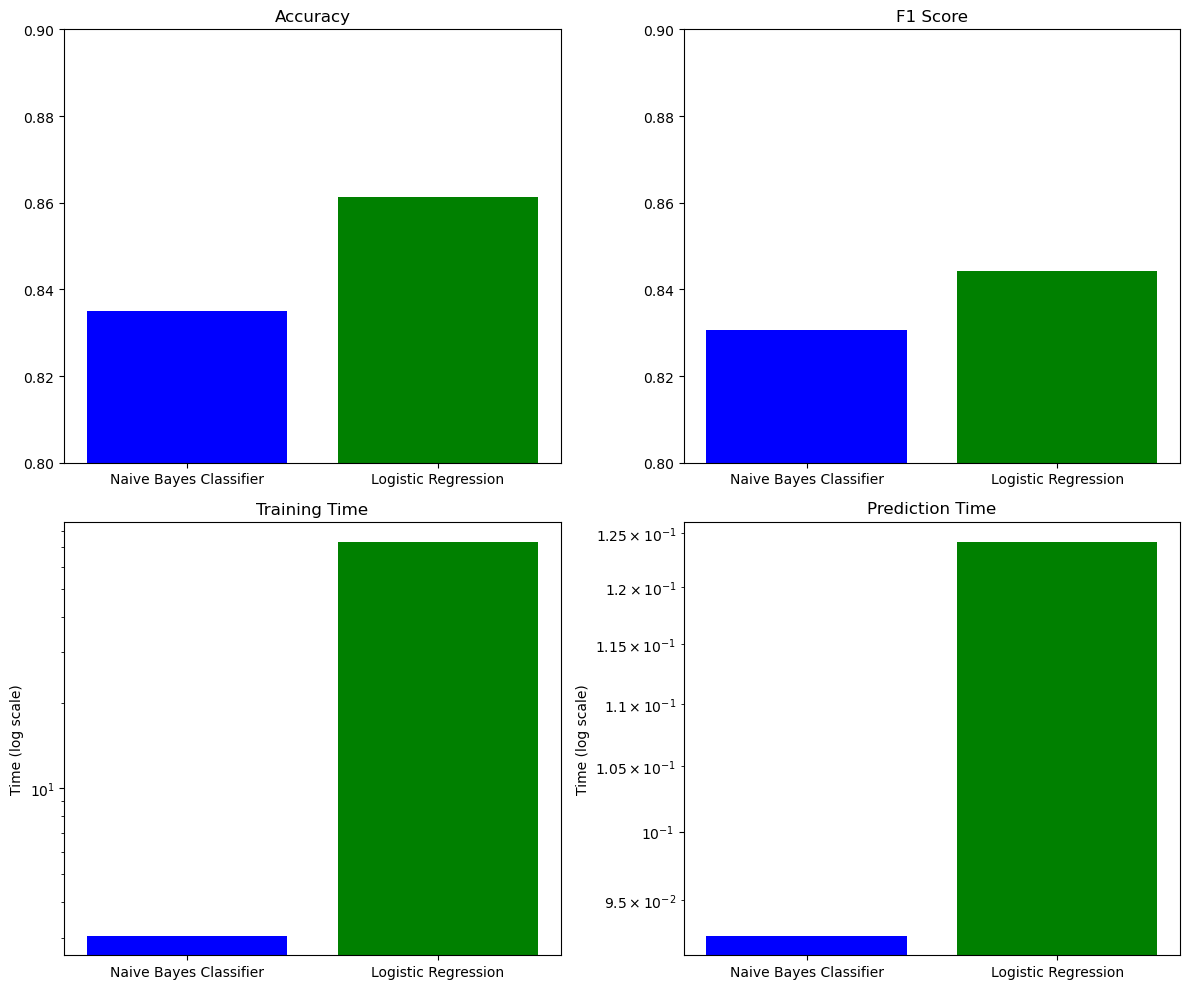

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Naive Bayes Classifier', 'Logistic Regression']
accuracy = [0.834942, 0.861224]
f1_score = [0.830586, 0.844282]
training_time = [3.048672, 73.403187]
prediction_time = [0.092530, 0.124183]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
axs[0, 0].bar(models, accuracy, color=['blue', 'green'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0.8, 0.9])

# F1 Score
axs[0, 1].bar(models, f1_score, color=['blue', 'green'])
axs[0, 1].set_title('F1 Score')
axs[0, 1].set_ylim([0.8, 0.9])

# Training Time
axs[1, 0].bar(models, training_time, color=['blue', 'green'])
axs[1, 0].set_title('Training Time')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylabel('Time (log scale)')

# Prediction Time
axs[1, 1].bar(models, prediction_time, color=['blue', 'green'])
axs[1, 1].set_title('Prediction Time')
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylabel('Time (log scale)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## 3. Model should be light for deployment.



Logistic Regression is giving more accuracy compared to Naive Bayes but it is taking more time

## 4. Model should have very less latency.

Naive Baye's Classifier (MultinomialNB) is building a model with very less latency with approximately 5.51 seconds.